<a href="https://colab.research.google.com/github/WolfSoko/ai-learning/blob/main/notebooks/Neural_Networks_Zero_to_Hero_done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
def f(x):
  return 3*x**2 - 4*x + 5

In [ ]:
f(3.0)


20.0

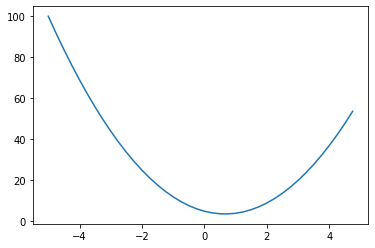

In [ ]:
xs = np.arange(-5 , 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [ ]:
h = 0.000001
x = 2 / 3
def d(x): return (f(x + h) - f(x)) / h
f(x)
d(x)






2.999378523327323e-06

In [ ]:
# lets get more complex
a = 2.0
b = -3.0
c = 10.0
d = a * b + c
print(d)


4.0


In [ ]:
# Derative with respect to a
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
a += h
d2 = a * b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1) / h) 

d1 4.0
d2 3.9999969999999996
slope -3.000000000419334


In [ ]:
# Derative with respect to b

h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
b += h
d2 = a * b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1) / h)

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [ ]:
# Derative with respect to d

h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
c += h
d2 = a * b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1) / h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [1]:
from prompt_toolkit.layout.menus import math
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out
  
  def __rmul__(self, other): # other * self
    return self * other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')
    
    def _backward():
      self.grad += out.data * out.grad # NOTE: in the video I incorrectly used = instead of +=. Fixed here.
    out._backward = _backward
    
    return out
  
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

# Neuer Abschnitt

In [21]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes: 
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes,edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'} )

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges: 
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

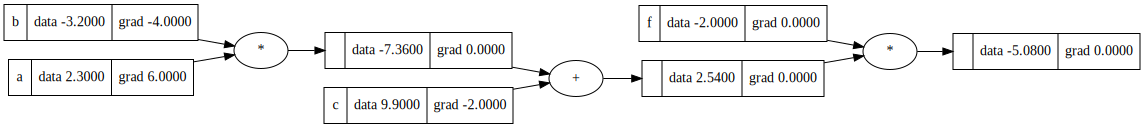

In [ ]:
draw_dot(L)


In [ ]:
# Back Prog with gradient

a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a*b;
d = e + c;
L = d * f

In [ ]:
 # manuel derivatives for the nodes (Gradient)
L.grad = 1.0 # static 1  because derative of 8 is 1
f.grad = 4.0 # dL/df is luckily d.value 
d.grad = -2.0 # dL/dd is luckily f.value
# For nested deriivatis the chain rule applies  
# WANT
# dL / dc = (dl / dd) * (dd / dc)
# KNOW
# dL / dd = -2.0
# dd / dc = 1.0 because derative c from c + e = 1.0
c.grad = -2.0 * 1.0

# WANT
# dL / de = (dl / dd) * (dd / de)
# KNOW
# dL / dd = -2.0
# dd / de = 1.0 because derative e from c + e = 1.0
e.grad = -2.0 * 1.0

# NEXT
# dL / de = -2.0

# e = a * b
# de / da ? b
# dL / da = (dL / de ) * (de / da)
# dL / da = -2.0 * -3.0 = 6.0 
a.grad = -2.0 * - 3.0
b.grad = -2.0 * 2.0

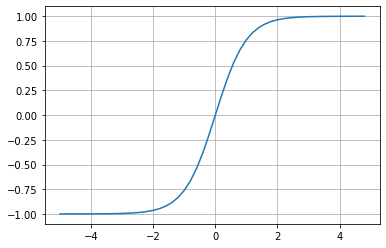

In [ ]:
# tanh activation function
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

In [ ]:
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# weights of neuron
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
b = Value(6.88137358700195432, label = 'b')

# weighted inputs
x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'

#sum if weighted inputs
x1w1x2x2 = x1w1 + x2w2; x1w1x2x2.label = 'x1*w1 + x2*x2'
# sum + bias
n = x1w1x2x2 + b; n.label = 'n'
o = n.tanh(); o.label= 'o'

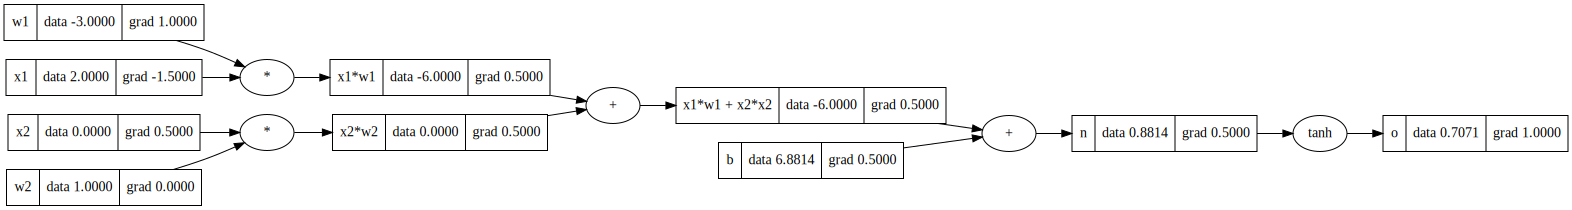

In [ ]:
draw_dot(o)

In [ ]:
o.backward()

In [ ]:
n._backward()

In [ ]:
b._backward()

In [ ]:
x1w1x2x2._backward()


In [ ]:
x1w1._backward()
x2w2._backward()

In [ ]:
x1.grad = 0.5 * -3.0
w1.grad = 0.5 * 2.0

x2.grad = 0.5 * 0.0
w2.grad = 0.5 * 1.0

In [ ]:
x1w1.grad = 0.5
x2w2.grad = 0.5 

In [ ]:
x1w1x2x2.grad = 0.5
b.grad = 0.5

In [ ]:
n.grad = 0.5

In [ ]:
o.grad = 1.0

In [ ]:
1 - o.data**2

0.5000000000124369

In [ ]:
# o = tanh(n)
# do / dn = 1 - tanh(n)²
#         = 1 - o.data ** 2  

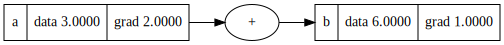

In [ ]:
a = Value(3.0, label = 'a')
b = a + a ; b.label = 'b'
b.backward()
draw_dot(b)

In [ ]:
import torch

x1 = torch.Tensor([2.0]).double()               ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()               ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()              ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()               ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double(); b.requires_grad = True

n = x1*w1 + x2*w2 + b
o = torch.tanh(n)
 
print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())





0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [99]:
import random

class Neuron:
  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))

  def __call__(self, x):
    # w*x + b
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out
  def parameters(self):
    return self.w + [self.b]

class Layer:
  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]

  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs

  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()] 

class MLP:
  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x  

  def parameters(self):
    return [
        p for layer in self.layers 
        for p in layer.parameters() 
    ]

x =  [2.0, 3.0, -1.0]
mlp = MLP(3, [4,4,1])
mlp(x)

Value(data=-0.6163446759390522)

In [85]:
xs = [
    [2.0,3.0,-1.0],
    [3.0,-1.0,0.5],
    [0.5,1.0,1.0],
    [1.0, 1.0, 1.0],
  ]
ys = [1.0, -1.0, -1.0, 1.0] # desired target 



[Value(data=-0.11948662583495809),
 Value(data=-0.7620160031123631),
 Value(data=-0.7711353616084979),
 Value(data=-0.745257214868913)]

In [123]:
for k in range(20):
  # forward pass
  ypred = [mlp(x) for x in xs]
  loss = sum([(yout -ygt)**2 for ygt, yout in zip(ys, ypred)])

  # backward pass
  for p in mlp.parameters():
    p.grad = 0.0 
  loss.backward()

  # gradient descent
  for p in mlp.parameters():
    p.data += -0.05 * p.grad
  
  print(k, loss.data)

ypred
  


0 0.0025445658623261917
1 0.0025372422920966536
2 0.0025299584275108146
3 0.002522713953946784
4 0.0025155085600548762
5 0.0025083419377156203
6 0.002501213781998235
7 0.0024941237911198836
8 0.002487071666405525
9 0.002480057112248292
10 0.002473079836070504
11 0.002466139548285458
12 0.0024592359622593995
13 0.0024523687942744608
14 0.0024455377634918884
15 0.002438742591915997
16 0.0024319830043585764
17 0.00242525872840373
18 0.002418569494373516
19 0.00241191503529381


[Value(data=0.9960703093430953),
 Value(data=-0.9808403283873499),
 Value(data=-0.9691490453352879),
 Value(data=0.9671732099253348)]